## <div align="center">Data Visualization</div>

In [ ]:
import os
import numpy as np
import pandas as pd
from tables import *
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

## INTRODUCTION: in this Jupyter Notebook I will upload , preprocess and visualize data. 

### Part 1. Start working with FILE data
### Part 2. Prepare functions
### Part 3. Preprocessing before plotting
### Part 4. Plotting data
### Part 5. Conclusion

## <div align="center">Part 1. Start working with FILE data</div>

#### Read CSV. Chage .wav to .hdf5

In [2]:
# specify YOUR PATH to the CSV file
csv_path=os.path.join('ESC50_Home','ESC-50-HumanClassification.csv')

# read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# check if all elements in the 'filename' column end with '.wav'
result = (df['filename'].str.endswith('.wav')).all()

# print the result
print(result)

# replace '.wav' with '.hdf5' in the 'filename' column
df['filename'] = df['filename'].str.replace('.wav', '.hdf5')

True


/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/580465781.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['filename'] = df['filename'].str.replace('.wav', '.hdf5')


#### Read categories from csv file

In [3]:
unique_categories = df['category'].unique()

# print the unique categories
print(unique_categories)

count_of_unique_categories = df['category'].nunique()
print(count_of_unique_categories)
print("")
print("Completed")

['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']
50

Completed


In [4]:
# list of categories taken from a blackboard
categories = [
    'Breathing',
    'Coughing',
    'Footsteps',
    'Laughing',
    'Sneezing',
    'Snoring',
    'Toilet_flush',
    'Vacuum_cleaner',
    'Washing_machine',
]

# change the capital letter to lowercase
categories = [category.lower() for category in categories]

# print the modified list
print(categories)
print("")
print("Completed")

['breathing', 'coughing', 'footsteps', 'laughing', 'sneezing', 'snoring', 'toilet_flush', 'vacuum_cleaner', 'washing_machine']

Completed


#### Make a dictionary with keys=categories and values=category_element

In [5]:
# Create empty dict for storing filenames for each category
filenames_by_category  = {}
number_of_files = 0

# iterate over the categories
for category in categories:
    # get all the filenames for the current category
    filenames = df.loc[df['category'].isin([category]), 'filename'].values.tolist()
    number_of_files += len(filenames)
    # create a key-value pair in the dictionary with the current category as the key and the list of filenames as the value
    filenames_by_category[category] = filenames

print("The number of files %f" %number_of_files)
print("Completed")

The number of files 360.000000
Completed


#### Make a dictionary with keys=categories and values=path_to_element

In [6]:
# Create empty dict for storing paths to files for each category
hdf5_paths_per_category = {}

# In order to control the flow of the code and not miss a change I keep trck on the number of files.
counter_files = 0
counter_categories = 0 

# IMPORTANT
# Here you give a folder name where the files are stored.
folder_name = "tracts"
# folder_name = "ptne"


# iterate over the categories
for category in categories:
    counter_categories += 1
    
    # Create an empty list where I store paths for one type of category
    all_paths_for_same_category = list()
    
    # iterate over the list that belongs to exact category
    for i in filenames_by_category[category]:
        counter_files += 1
        
        # Create variable that store a single path
        # CHANGE TO YOUR PATH
        temp_hdf5_path=os.path.join('ESC50_Home', folder_name, i)
        
        # Store paths for one type of category in a list.
        # With the new category the list will be updated to 0
        all_paths_for_same_category.append(temp_hdf5_path)
        
    # Store a list according to the category
    hdf5_paths_per_category[category] = all_paths_for_same_category


print(type(hdf5_paths_per_category["snoring"]))
print(len(hdf5_paths_per_category["snoring"]))

print("The number of categories %f" %counter_categories)
print("The number of files %f" %counter_files)
print("Completed")

<class 'list'>
40
The number of categories 9.000000
The number of files 360.000000
Completed


#### Store labels from tract hdf5 file 

In [7]:
#hdf5 files read in using h5py modules
the_file = h5py.File(hdf5_paths_per_category["snoring"][0], 'r')

# Print out
print("THDF5ract Labels: %s" % the_file.keys())

# Save Labels
hdf5_Labels  = list(the_file.keys()) # # Has 4 values inside


# Keys are listed out
print("HDF5 Labels: %s" % hdf5_Labels)


THDF5ract Labels: <KeysViewHDF5 ['E', 'f_tract', 's_tract']>
HDF5 Labels: ['E', 'f_tract', 's_tract']


In [8]:
# Visualize labels

tr_label_1 = hdf5_Labels[0]
tr_label_2 = hdf5_Labels[1]
tr_label_3 = hdf5_Labels[2]

print(tr_label_1)
print(tr_label_2)
print(tr_label_3)

E
f_tract
s_tract


## <div align="center">Part 2. Prepare functions</div>

### Store all the files of one category into the list

In [9]:
def create_arr_all_files_of_category(category_name, label_names):
    """ This code extracts data from hdf5 files, access the s_tract dataset in each file,  
    and append a portion of that data to a list called list_of_data"""
    
    counter_files = 0
    list_of_data = list() # Create list. Here we will store all arrays for 1 category
    
    # Get access to a file by iterating over the paths 
    for i in hdf5_paths_per_category[category_name]:
#         print(i)
        
        # By useing a path(i) we open hdf4 file in reading format(f).
        with h5py.File(i, 'r') as f:
#             print(f)
            
            # access the "s_tract" dataset in the file
            # s_tract has shape (100, 8497), class 'numpy.ndarray
            tract = f[label_names][()]
            
            # Append a file and get rid of zeros in the bottom and in the top
            list_of_data.append(tract)
        
        counter_files += 1
        
#     print("Completed")
#     print(len(list_of_data))
    return list_of_data

### Functions for Spectograms and Histograms

#### Spectogram with log

In [10]:
def plot_spectrograms_log(input_arrays):
    num_arrays = len(input_arrays)
    fig, axes = plt.subplots(nrows=1, ncols=num_arrays, figsize=(8*num_arrays,3))

    for i, arr in enumerate(input_arrays):
        # Plot the spectrogram
        im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')

        # Add labels and colorbar
        axes[i].set_title(hdf5_Labels[i])
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Frequency')
        
    cbar = fig.colorbar(im, ax=axes[i])
    cbar.set_label('Intensity')

    # Show the plot
    plt.show()


#### Spectogram standard 

In [11]:
def plot_spectrograms(input_arrays):
    num_arrays = len(input_arrays)
    fig, axes = plt.subplots(nrows=1, ncols=num_arrays, figsize=(8*num_arrays,3))

    for i, arr in enumerate(input_arrays):
        # Plot the spectrogram
        im = axes[i].imshow(arr, interpolation='nearest', aspect='auto', origin='lower')

        # Add labels and colorbar
        axes[i].set_title(hdf5_Labels[i])
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Frequency')
        
    cbar = fig.colorbar(im, ax=axes[i])
    cbar.set_label('Intensity')

    # Show the plot
    plt.show()


#### Histogram

In [12]:
# WORKING
def plot_histograms2(input_arrays):
    num_arrays = len(input_arrays)
    fig, axes = plt.subplots(nrows=1, ncols=num_arrays, figsize=(8*num_arrays,3))

    for i, arr in enumerate(input_arrays):
        print(i)
        # Plot the histogram
        # The important question is number of bins. Here the number of bins is random.
        axes[i].hist(arr, bins=30, color = 'blue', edgecolor = 'black')
        sns.histplot(arr, ax=axes[i])

        # Add labels
        axes[i].set_title(hdf5_Labels[i+1])
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Show the plot
    plt.show()



#### Plotting histofram function.  Iterate over each label of hdf5 tract.
##### I incude only f_tract and s_tract. I skip "E" because it will never plot histogram if I incude it

In [13]:
def category_4_label_hist(info_samples, category):
    data1D = list()
    
    for i in hdf5_Labels[1:]:
        flat_sample = info_samples[category][i][5].flatten()
        data1D.append(flat_sample)
    plot_histograms2(data1D)
    
    return data1D
    



#### Plotting histofram function.  Iterate over each label of hdf5 tract.

In [14]:
def category_4_labels(info_samples, category):
    sample_data_4 = list()
    
    for i in hdf5_Labels:
        sample_data_4.append(info_samples[category][i][5])
        
    plot_spectrograms(sample_data_4)
    plot_spectrograms_log(sample_data_4)

## <div align="center">Part 3. Preprocessing before plotting</div>

#### Sorting out data and storing for the further plotting
#### Spectograms

In [15]:

print(categories)
print(hdf5_Labels)
glagg = 0
print("")

info_samples_full = {}
# info_labels = {}

for i in categories:
    info_labels = {}
    for j in hdf5_Labels:
        info_labels[j] = create_arr_all_files_of_category(i, j)
        info_samples_full[i] = info_labels  
        glagg += 1
        
print(glagg)

['breathing', 'coughing', 'footsteps', 'laughing', 'sneezing', 'snoring', 'toilet_flush', 'vacuum_cleaner', 'washing_machine']
['E', 'f_tract', 's_tract']

27


#### Histograms without "E"

In [16]:
# Save Labels for Histograms without "E"
glagg = 0
print("")

info_samples = {}
# info_labels = {}

for i in categories:
    info_labels = {}
    for j in hdf5_Labels[1:]:
        info_labels[j] = create_arr_all_files_of_category(i, j)
        info_samples[i] = info_labels  
        glagg += 1

print(hdf5_Labels[1:])
print(glagg)


['f_tract', 's_tract']
18


## <div align="center">Part 4. Plotting data</div>
### <div align="center">HISTOGRAMS</div>

### <div align="center">breathing</div>

You are observing category:   breathing
0
1


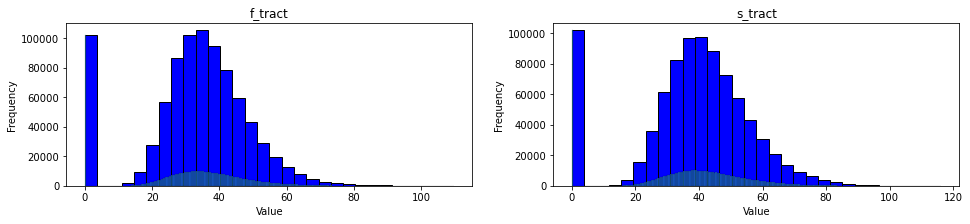

Beetwen


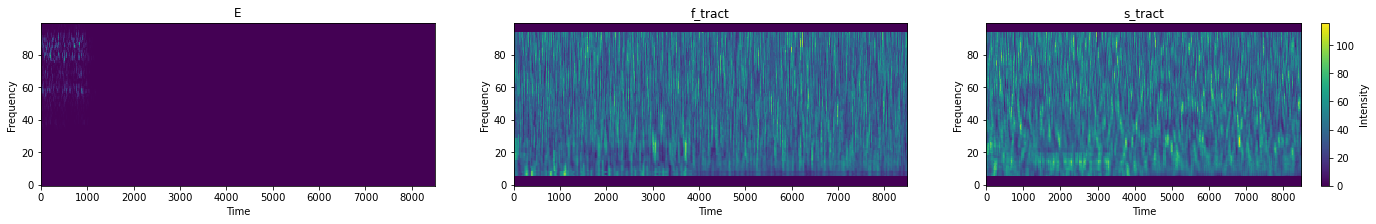

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


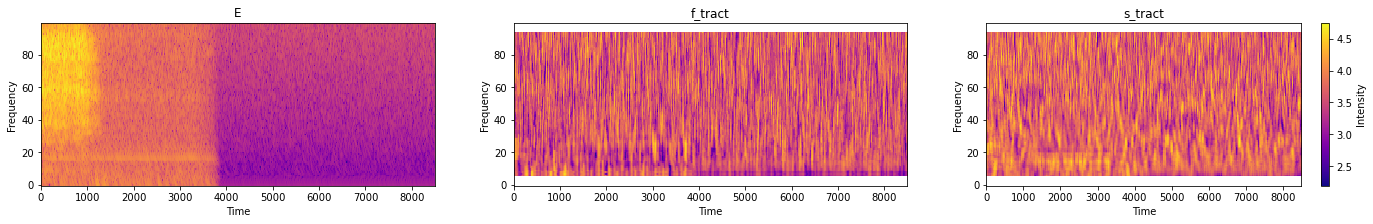

In [17]:
print("You are observing category:   %s" % categories[0])

category_4_label_hist(info_samples, categories[0])
print("Beetwen")
category_4_labels(info_samples_full, categories[0])

### <div align="center">coughing</div>

You are observing category:   coughing
0
1


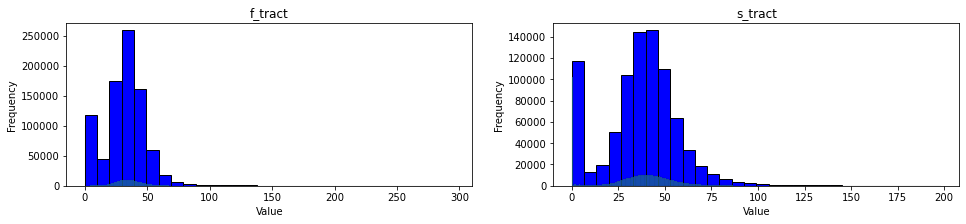

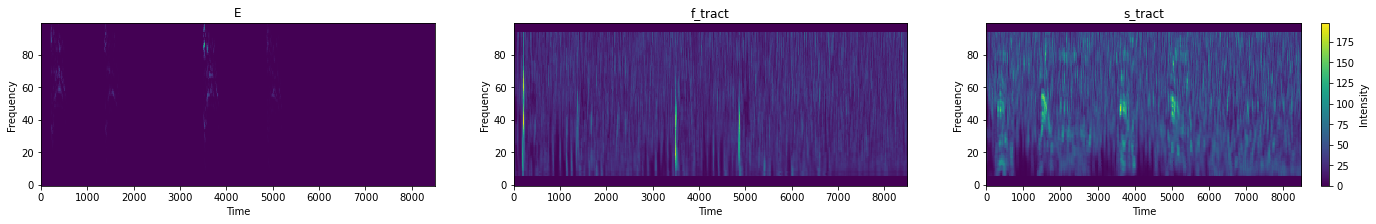

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


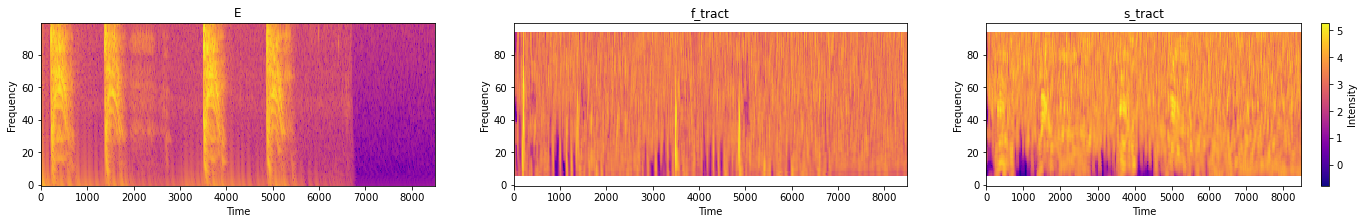

In [18]:
print("You are observing category:   %s" % categories[1])

category_4_label_hist(info_samples, categories[1])
print("")
category_4_labels(info_samples_full, categories[1])

### <div align="center">footsteps</div>

You are observing category:   footsteps
0
1


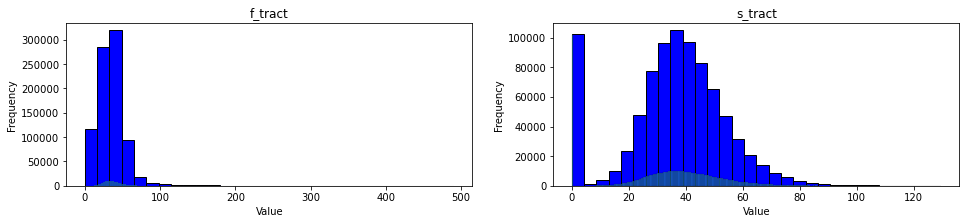

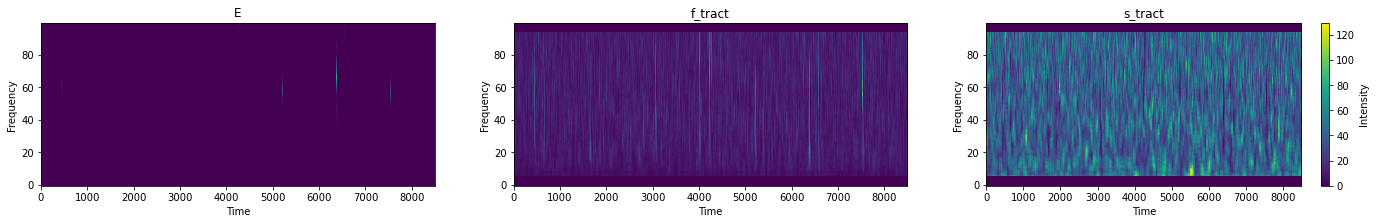

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


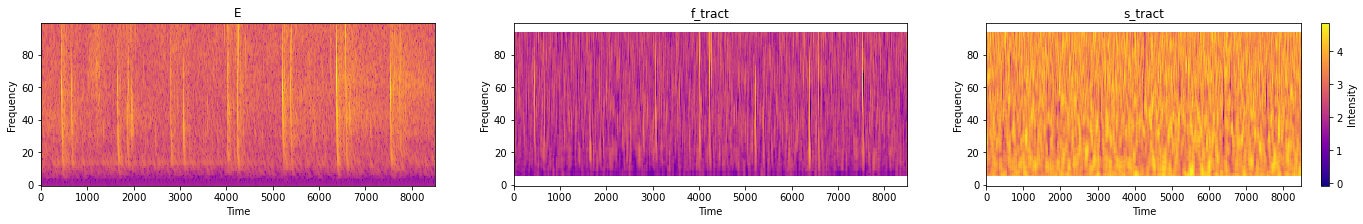

In [19]:
print("You are observing category:   %s" % categories[2])

category_4_label_hist(info_samples, categories[2])
print("")
category_4_labels(info_samples_full, categories[2])

### <div align="center">laughing</div>

You are observing category:   laughing
0
1


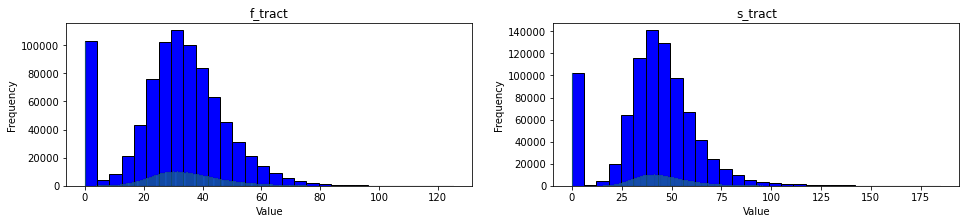

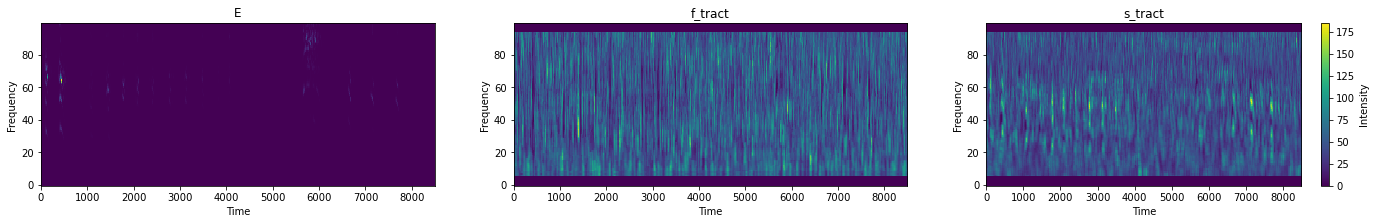

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


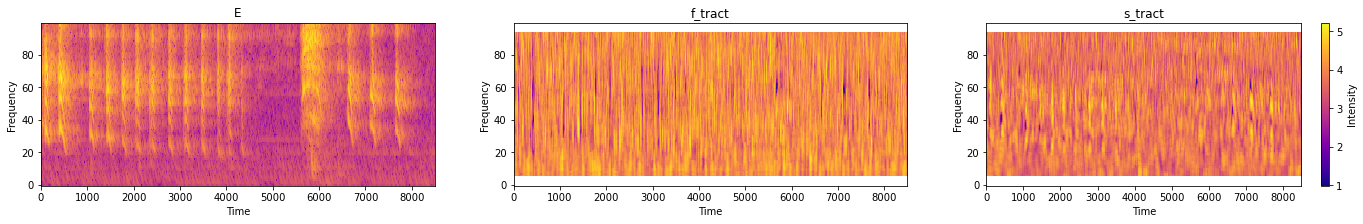

In [20]:
print("You are observing category:   %s" % categories[3])

category_4_label_hist(info_samples, categories[3])
print("")
category_4_labels(info_samples_full, categories[3])

### <div align="center">sneezing</div>

You are observing category:   sneezing
0
1


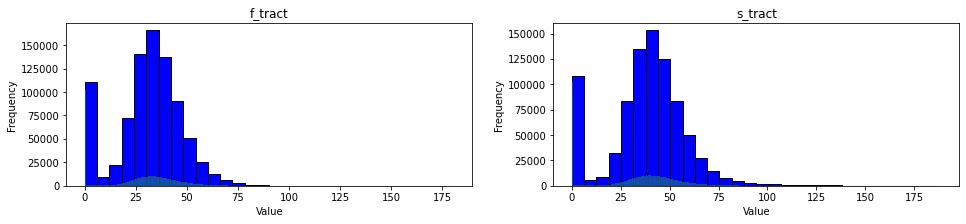

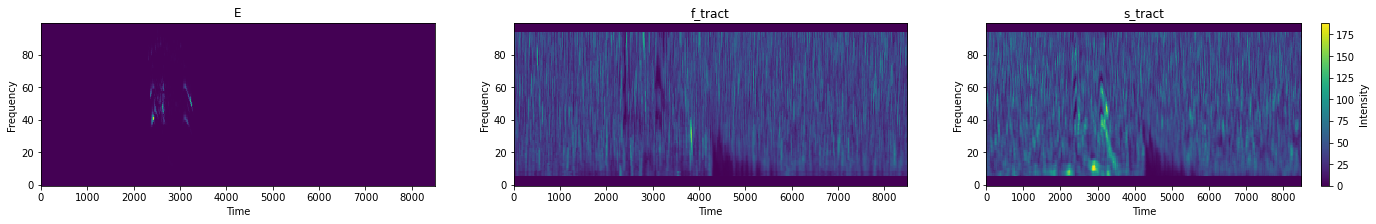

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


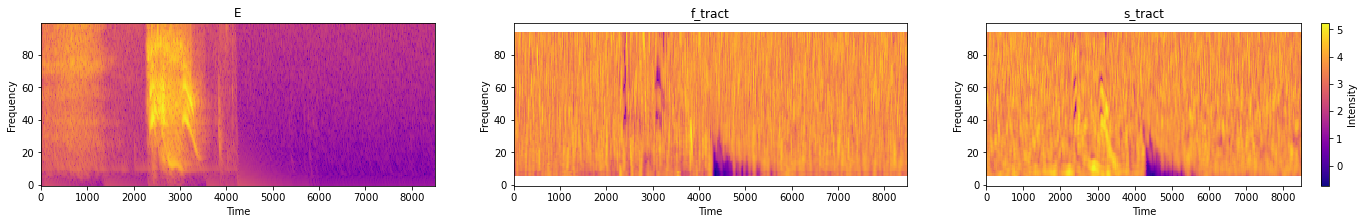

In [21]:
print("You are observing category:   %s" % categories[4])

category_4_label_hist(info_samples, categories[4])
print("")
category_4_labels(info_samples_full, categories[4])

### <div align="center">snoring</div>

You are observing category:   snoring
0
1


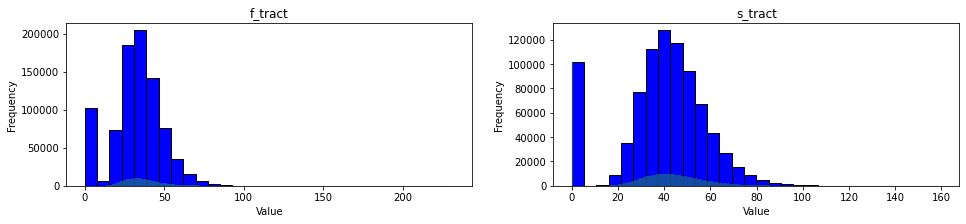

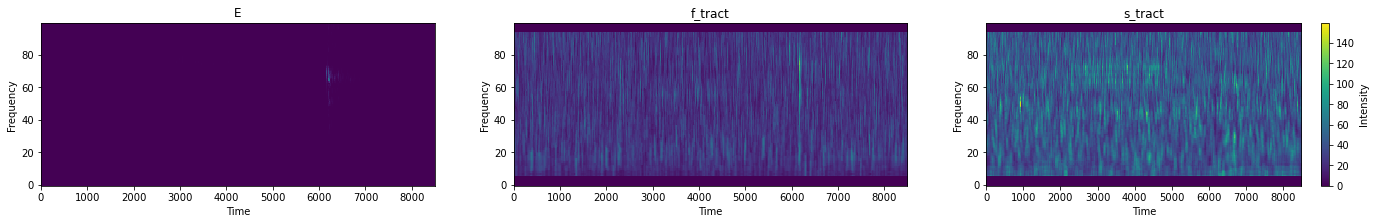

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


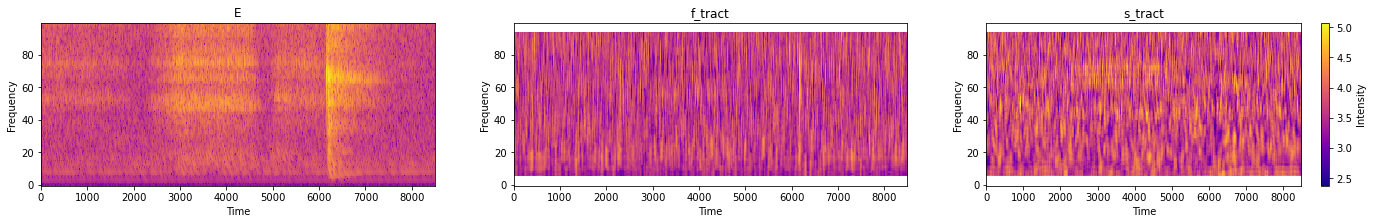

In [22]:
print("You are observing category:   %s" % categories[5])

category_4_label_hist(info_samples, categories[5])
print("")
category_4_labels(info_samples_full, categories[5])

### <div align="center">toilet flush</div>

You are observing category:   toilet_flush
0
1


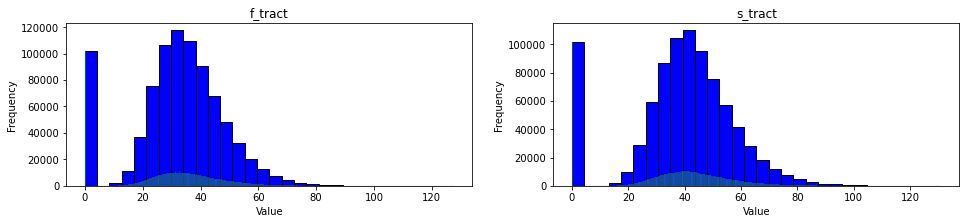

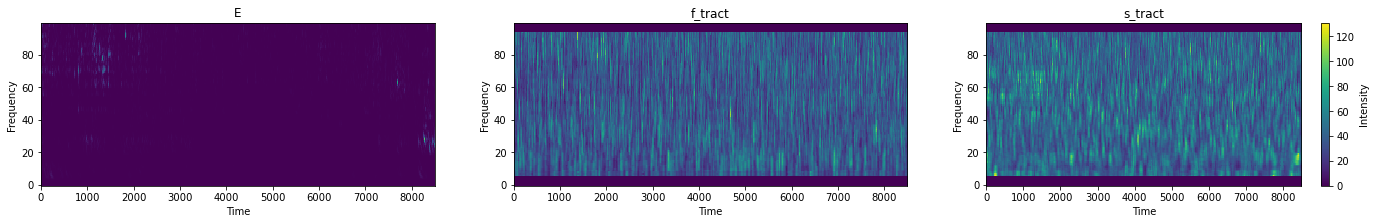

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


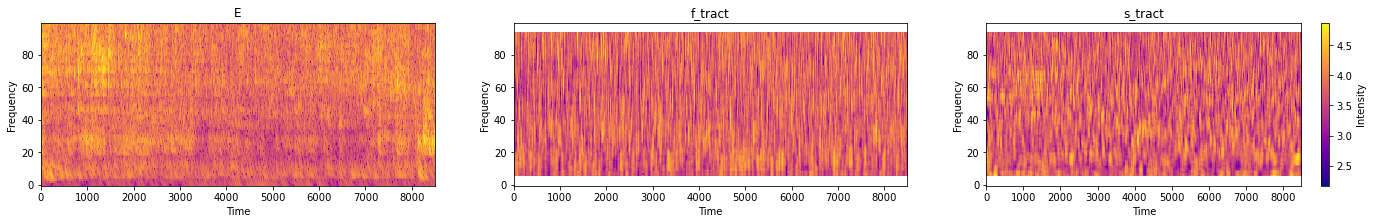

In [23]:
print("You are observing category:   %s" % categories[6])

category_4_label_hist(info_samples, categories[6])
print("")
category_4_labels(info_samples_full, categories[6])

### <div align="center">vacuum cleaner</div>

You are observing category:   vacuum_cleaner
0
1


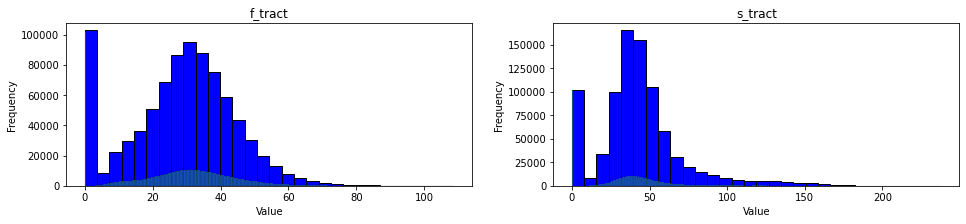

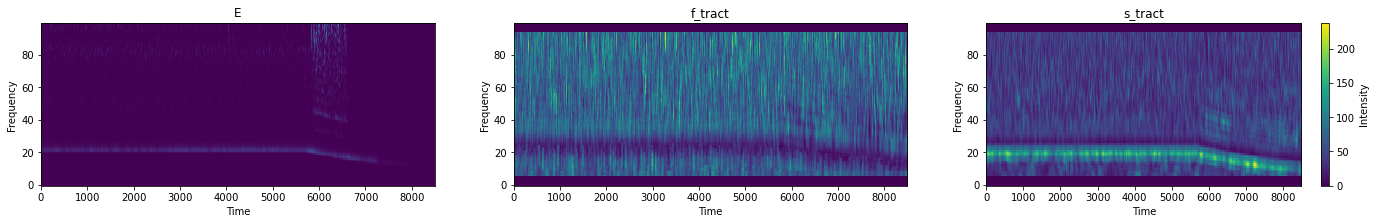

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


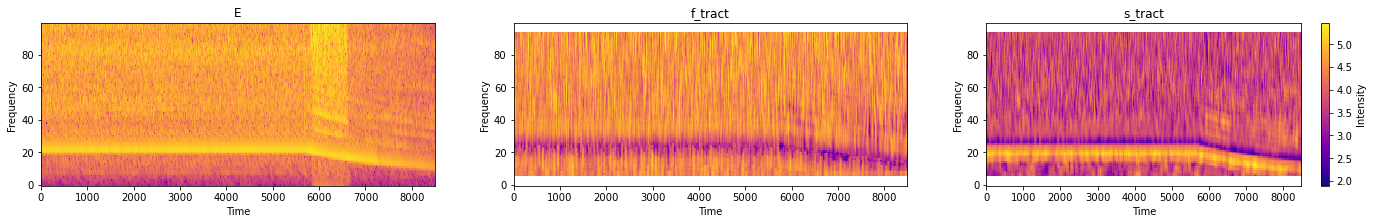

In [24]:
print("You are observing category:   %s" % categories[7])

category_4_label_hist(info_samples, categories[7])
print("")
category_4_labels(info_samples_full, categories[7])

### <div align="center">washing machine</div>

You are observing category:   washing_machine
0
1


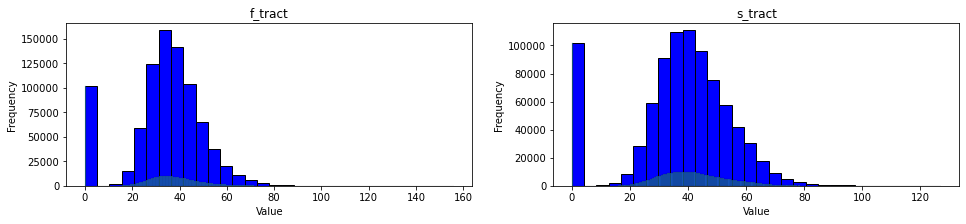

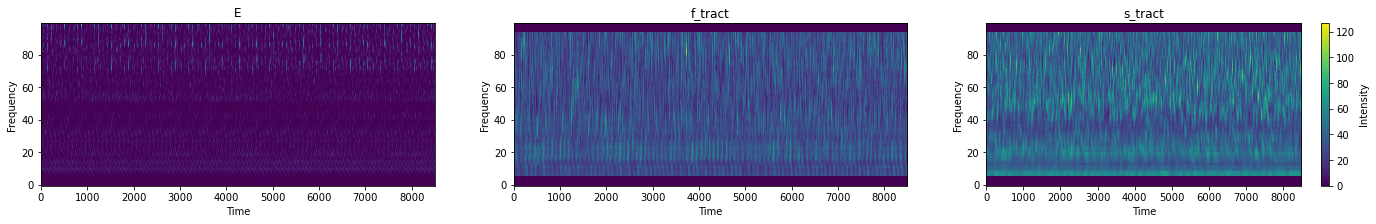

/var/folders/j7/x7b5nvcx4bg27rbk_51dbkgm0000gn/T/ipykernel_34617/1352259026.py:7: RuntimeWarning: divide by zero encountered in log
  im = axes[i].imshow(np.log(arr), interpolation='nearest', aspect='auto', origin='lower', cmap='plasma')


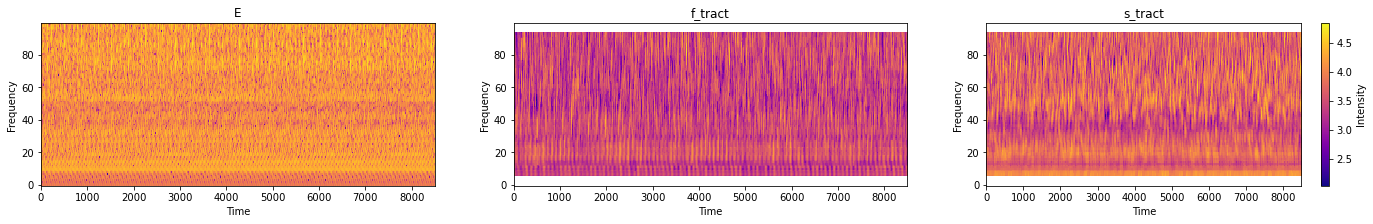

In [25]:
print("You are observing category:   %s" % categories[8])

category_4_label_hist(info_samples, categories[8])
print("")
category_4_labels(info_samples_full, categories[8])

## <div align="center">Part 5. Conclusion</div>

1. "E" tract data cannot be plotted as histogram(take a lot of time). As we can see on spectograms there are lots of small values. It does not seem useful for classififcation on clustering, but I will try to use it. 
2. Based on spectogram observation f_tract and s_tract have empty section on top and bottom. These zeros represented in spikes on histogram, standing apart from the main "bell". They should be deleted during further preprocessing.

Next Jupyter Notebook will work on making features for SVM and K-Means.